# Lazy Predict for regression

In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Imports
import tensorflow as tf
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
import numpy as np
import lazypredict
import matplotlib.pyplot as plt
import seaborn as sns
import random

#from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score

## Set random seed for reproducibility

In [11]:
SEED = 64

#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Data Loading

In [14]:
# Only modify this
file_name = "Ozono"

In [15]:
df = pd.read_csv(f'../raw_data/{file_name}.csv')

In [16]:
# Display the first few rows of the dataframe
print(df.head())

# Display the dataframe's information (column types, non-null values, etc.)
print(df.info())

# Get the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

   MES  DIA  HORA  DS  H-D-S  BJU  CUT   FAC  GAM   INN  MER  MGH   MON   NEZ  \
0    1    1     1   1      1 4.86 2.57 10.14 3.71 30.71 4.71 3.14 28.57 17.86   
1    1    1     2   1      2 5.29 2.43  6.71 3.86 29.57 4.14 2.29 26.86 16.71   
2    1    1     3   1      3 4.71 3.00  7.14 2.71 31.43 2.57 1.71 20.57 13.71   
3    1    1     4   1      4 1.00 3.00  3.00 3.00 32.00 1.00 2.00  4.00 10.00   
4    1    1     5   1      5 0.00 4.00  2.00 2.00 32.00 2.00 2.00  4.00  8.00   

    PED  SAG   TAH  TLA   UAX  
0  9.00 7.71 10.14 5.71 13.29  
1  8.57 5.57  9.86 3.71 13.29  
2  9.57 4.86  8.43 4.00 10.57  
3 11.00 4.00 11.00 1.00  5.00  
4 16.00 1.00 12.00 1.00  6.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40128 entries, 0 to 40127
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MES     40128 non-null  int64  
 1   DIA     40128 non-null  int64  
 2   HORA    40128 non-null  int64  
 3   DS      40128 non-null

In [18]:
# Summary statistics for numerical columns
print(df.describe())

# For categorical columns if any
#print(df.describe(include='object'))

           MES      DIA     HORA       DS    H-D-S      BJU      CUT      FAC  \
count 40128.00 40128.00 40128.00 40128.00 40128.00 40128.00 40128.00 40128.00   
mean      6.21    15.71    12.50   161.78  4147.71    30.39    26.86    29.02   
std       3.40     8.79     6.92   113.16  2496.17    27.17    25.10    24.58   
min       1.00     1.00     1.00     1.00     1.00     0.00     0.00     0.00   
25%       3.00     8.00     6.75    52.00  2007.00     9.00     5.00    10.00   
50%       6.00    16.00    12.50   156.50  4013.00    22.00    20.00    22.00   
75%       9.00    23.00    18.25   261.00  6252.25    46.00    43.00    42.00   
max      12.00    31.00    24.00   365.00  8760.00   169.00   154.00   161.00   

           GAM      INN      MER      MGH      MON      NEZ      PED      SAG  \
count 40128.00 40128.00 40128.00 40128.00 40128.00 40128.00 40128.00 40128.00   
mean     30.92    34.02    27.40    29.96    30.47    31.82    34.87    25.98   
std      27.72    17.26    

In [19]:
# Check for missing values
print(df.isnull().sum())

MES      0
DIA      0
HORA     0
DS       0
H-D-S    0
BJU      0
CUT      0
FAC      0
GAM      0
INN      0
MER      0
MGH      0
MON      0
NEZ      0
PED      0
SAG      0
TAH      0
TLA      0
UAX      0
dtype: int64


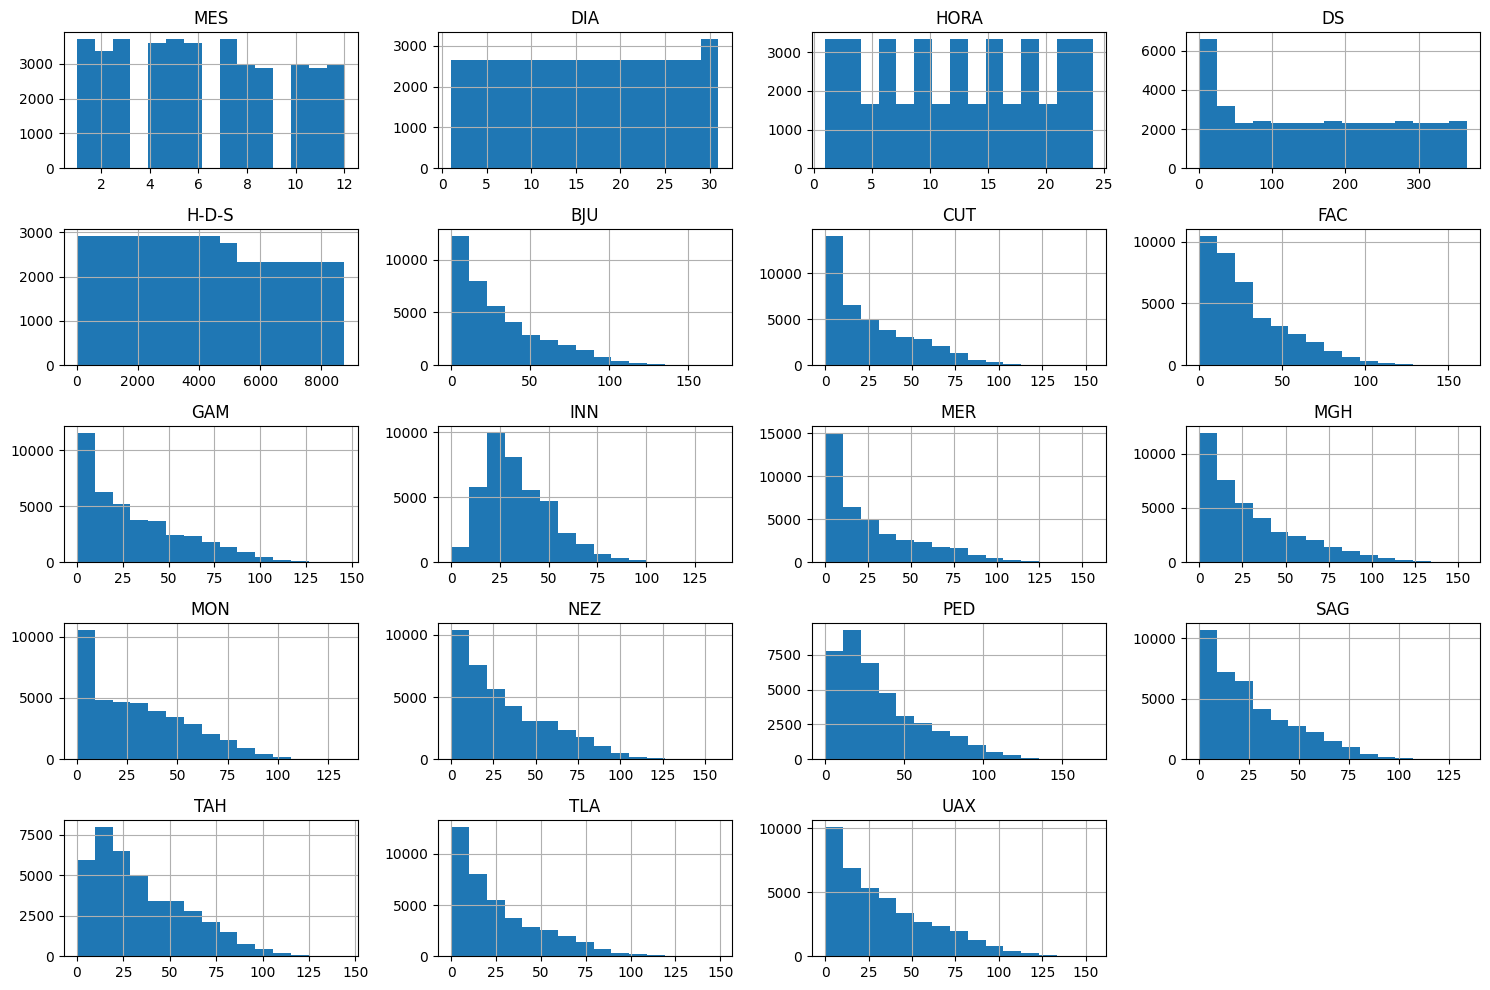

In [20]:
# Histograms for numerical data
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

## Data Preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1]

X = scaler.fit_transform(X)
X

array([[-1.53009318, -1.67332846, -1.66132477, ..., -0.81732429,
        -0.97349392, -0.85458353],
       [-1.53009318, -1.67332846, -1.51686175, ..., -0.91318957,
        -0.98487095, -0.93721451],
       [-1.53009318, -1.67332846, -1.37239873, ..., -0.94514466,
        -1.0417561 , -0.92541009],
       ...,
       [ 0.23264164,  1.73862908,  1.37239873, ..., -0.32521586,
        -0.31931469, -0.71883262],
       [ 0.23264164,  1.73862908,  1.51686175, ..., -0.32521586,
        -0.31931469, -0.63620163],
       [ 0.23264164,  1.73862908,  1.66132477, ..., -0.32521586,
        -0.31931469, -0.55357064]])

In [22]:
y = df.iloc[:,-1]
y

0       13.29
1       13.29
2       10.57
3        5.00
4        6.00
         ... 
40123    7.00
40124    6.00
40125   11.00
40126    9.00
40127    4.00
Name: UAX, Length: 40128, dtype: float64

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state = 123)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123)

In [24]:
y_val

20986   53.00
7487    10.14
5298    34.00
2639    20.00
32964   38.14
         ... 
3406    28.00
20631   68.00
9893     1.00
17212    7.00
32360   21.00
Name: UAX, Length: 8026, dtype: float64

## Model Architecture (Lazy Predict)

In [25]:
#lazypredict.supervised.REGRESSORS = lazypredict.supervised.REGRESSORS[33:36]
#lazypredict.supervised.REGRESSORS

In [27]:
LazyRegressor

lazypredict.Supervised.LazyRegressor

In [28]:
clf = LazyRegressor(verbose=2, ignore_warnings=True, custom_metric=None)

## Model Training

In [29]:
models, predictions = clf.fit(X_train, X_val, y_train, y_val)

  0%|          | 0/42 [00:00<?, ?it/s]

  2%|▏         | 1/42 [00:01<01:08,  1.68s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9151358087000871, 'Adjusted R-Squared': 0.914945031199975, 'RMSE': 8.25947223715429, 'Time taken': 1.6828994750976562}


  5%|▍         | 2/42 [00:03<01:09,  1.75s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9461612665156223, 'Adjusted R-Squared': 0.9460402352676244, 'RMSE': 6.578660529771984, 'Time taken': 1.7883610725402832}
{'Model': 'BayesianRidge', 'R-Squared': 0.9404504999315172, 'Adjusted R-Squared': 0.9403166306919477, 'RMSE': 6.918773591992889, 'Time taken': 0.04114413261413574}


 10%|▉         | 4/42 [00:03<00:28,  1.32it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8983362369182586, 'Adjusted R-Squared': 0.8981076934268797, 'RMSE': 9.040098233359481, 'Time taken': 0.29604005813598633}
{'Model': 'DummyRegressor', 'R-Squared': -1.757956783698944e-06, 'Adjusted R-Squared': -0.0022497948798787526, 'RMSE': 28.352440056884134, 'Time taken': 0.018494844436645508}


 14%|█▍        | 6/42 [00:04<00:17,  2.07it/s]

{'Model': 'ElasticNet', 'R-Squared': 0.921220676054344, 'Adjusted R-Squared': 0.9210435775366692, 'RMSE': 7.9578579748534795, 'Time taken': 0.3382573127746582}


 17%|█▋        | 7/42 [00:06<00:29,  1.21it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9391257188085207, 'Adjusted R-Squared': 0.9389888714173071, 'RMSE': 6.995310274337394, 'Time taken': 1.8488984107971191}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8908526653720769, 'Adjusted R-Squared': 0.8906072985651201, 'RMSE': 9.366916020294752, 'Time taken': 0.09601020812988281}


 21%|██▏       | 9/42 [00:14<01:12,  2.19s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.952831249064061, 'Adjusted R-Squared': 0.9527252121567491, 'RMSE': 6.157681861131541, 'Time taken': 8.039119720458984}


 26%|██▌       | 11/42 [01:47<09:44, 18.85s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.8722251296070671, 'Adjusted R-Squared': 0.8719378874855394, 'RMSE': 10.134744016251537, 'Time taken': 93.39059829711914}


 29%|██▊       | 12/42 [01:51<07:54, 15.81s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9465585266711192, 'Adjusted R-Squared': 0.946438388477049, 'RMSE': 6.554344592577291, 'Time taken': 4.405941724777222}


 31%|███       | 13/42 [01:52<05:58, 12.36s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9536392515365224, 'Adjusted R-Squared': 0.9535350310454093, 'RMSE': 6.10471338267584, 'Time taken': 0.9312913417816162}


c:\Users\jiayu\anaconda3\envs\Tinto-HNN\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 33%|███▎      | 14/42 [01:53<04:22,  9.37s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9399180352827294, 'Adjusted R-Squared': 0.9397829690450735, 'RMSE': 6.949637023168753, 'Time taken': 0.3331179618835449}


 36%|███▌      | 15/42 [01:53<03:08,  6.99s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9451199130825555, 'Adjusted R-Squared': 0.9449965408377055, 'RMSE': 6.641978331620983, 'Time taken': 0.280597448348999}


 38%|███▊      | 16/42 [02:35<07:09, 16.53s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.46428564825517604, 'Adjusted R-Squared': -0.46757741067163594, 'RMSE': 34.30859727686511, 'Time taken': 41.99938702583313}
{'Model': 'Lars', 'R-Squared': 0.9405682444036845, 'Adjusted R-Squared': 0.9404346398575706, 'RMSE': 6.911930121993735, 'Time taken': 0.025643110275268555}
{'Model': 'LarsCV', 'R-Squared': 0.9391753068378247, 'Adjusted R-Squared': 0.939038570922136, 'RMSE': 6.992460513194448, 'Time taken': 0.07322168350219727}


 45%|████▌     | 19/42 [02:36<02:59,  7.82s/it]

{'Model': 'Lasso', 'R-Squared': 0.9350520705286663, 'Adjusted R-Squared': 0.9349060654418069, 'RMSE': 7.225580009636871, 'Time taken': 0.9828851222991943}


 55%|█████▍    | 23/42 [02:39<01:09,  3.63s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9402521395218449, 'Adjusted R-Squared': 0.9401178243615343, 'RMSE': 6.930287288842697, 'Time taken': 2.6856191158294678}
{'Model': 'LassoLars', 'R-Squared': 0.935055443897853, 'Adjusted R-Squared': 0.9349094463944386, 'RMSE': 7.225392360348678, 'Time taken': 0.021026134490966797}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9405682444036845, 'Adjusted R-Squared': 0.9404346398575706, 'RMSE': 6.911930121993735, 'Time taken': 0.07572007179260254}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9405682444036845, 'Adjusted R-Squared': 0.9404346398575706, 'RMSE': 6.911930121993735, 'Time taken': 0.032622575759887695}
{'Model': 'LinearRegression', 'R-Squared': 0.9405682444036846, 'Adjusted R-Squared': 0.9404346398575707, 'RMSE': 6.911930121993726, 'Time taken': 0.0230712890625}


c:\Users\jiayu\anaconda3\envs\Tinto-HNN\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
 60%|█████▉    | 25/42 [02:39<00:43,  2.54s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9396506203042368, 'Adjusted R-Squared': 0.9395149529088923, 'RMSE': 6.965085700099744, 'Time taken': 0.13490796089172363}


c:\Users\jiayu\anaconda3\envs\Tinto-HNN\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 62%|██████▏   | 26/42 [02:58<01:26,  5.43s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9508070683632446, 'Adjusted R-Squared': 0.9506964810309776, 'RMSE': 6.288418137789583, 'Time taken': 18.610244035720825}


 74%|███████▍  | 31/42 [03:24<00:49,  4.51s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9404069435982066, 'Adjusted R-Squared': 0.9402729764425638, 'RMSE': 6.921303431228625, 'Time taken': 26.445335149765015}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8915942645147994, 'Adjusted R-Squared': 0.8913505648471669, 'RMSE': 9.335040131498799, 'Time taken': 0.020496606826782227}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9349152172777, 'Adjusted R-Squared': 0.9347689045402201, 'RMSE': 7.233188595211612, 'Time taken': 0.04702186584472656}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9193131656017689, 'Adjusted R-Squared': 0.9191317789377039, 'RMSE': 8.053624888199458, 'Time taken': 0.031351566314697266}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8159302766339157, 'Adjusted R-Squared': 0.8155164818267983, 'RMSE': 12.164135213308043, 'Time taken': 0.038585662841796875}


 76%|███████▌  | 32/42 [03:36<00:55,  5.60s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.0692256480381892, 'Adjusted R-Squared': -0.07162930254857858, 'RMSE': 29.317352113954197, 'Time taken': 11.260712146759033}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9355560429611733, 'Adjusted R-Squared': 0.9354111708209587, 'RMSE': 7.197491471079553, 'Time taken': 0.05101895332336426}


 88%|████████▊ | 37/42 [03:53<00:19,  3.96s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9520236816570288, 'Adjusted R-Squared': 0.9519158293115594, 'RMSE': 6.210170415515288, 'Time taken': 17.55662512779236}
{'Model': 'Ridge', 'R-Squared': 0.940486260635969, 'Adjusted R-Squared': 0.9403524717876421, 'RMSE': 6.9166958468086115, 'Time taken': 0.022501707077026367}
{'Model': 'RidgeCV', 'R-Squared': 0.9405576597261435, 'Adjusted R-Squared': 0.9404240313853255, 'RMSE': 6.912545595099362, 'Time taken': 0.032518625259399414}
{'Model': 'SGDRegressor', 'R-Squared': 0.9401143750853787, 'Adjusted R-Squared': 0.9399797502260726, 'RMSE': 6.938272490267262, 'Time taken': 0.051500797271728516}


 90%|█████████ | 38/42 [04:21<00:30,  7.73s/it]

{'Model': 'SVR', 'R-Squared': 0.9402724797685216, 'Adjusted R-Squared': 0.9401382103337561, 'RMSE': 6.929107533189959, 'Time taken': 27.39624857902527}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9405682444036846, 'Adjusted R-Squared': 0.9404346398575707, 'RMSE': 6.911930121993726, 'Time taken': 0.027004241943359375}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9143883590915252, 'Adjusted R-Squared': 0.9141959013000487, 'RMSE': 8.29576555015273, 'Time taken': 0.023636817932128906}


 98%|█████████▊| 41/42 [04:21<00:04,  4.61s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9522254326672823, 'Adjusted R-Squared': 0.9521180338647359, 'RMSE': 6.197099090284631, 'Time taken': 0.23367786407470703}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3885
[LightGBM] [Info] Number of data points in the train set: 24076, number of used features: 18
[LightGBM] [Info] Start training from score 33.497330


100%|██████████| 42/42 [04:21<00:00,  6.23s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9535950419174671, 'Adjusted R-Squared': 0.9534907220416727, 'RMSE': 6.1076234170433255, 'Time taken': 0.3490915298461914}


## Model Evaluation

In [30]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.95,0.95,6.10,0.93
LGBMRegressor,0.95,0.95,6.11,0.35
ExtraTreesRegressor,0.95,0.95,6.16,8.04
XGBRegressor,0.95,0.95,6.20,0.23
RandomForestRegressor,0.95,0.95,6.21,17.56
MLPRegressor,0.95,0.95,6.29,18.61
GradientBoostingRegressor,0.95,0.95,6.55,4.41
BaggingRegressor,0.95,0.95,6.58,1.79
KNeighborsRegressor,0.94,0.95,6.64,0.28


In [31]:
# Convert results into a DataFrame
test_results = pd.DataFrame(models)

In [32]:
# Save to a text file
test_results.to_csv(f'model_results/{file_name}_results_val.txt', index=True)